#### ResNet32


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# -------------------------------
# Load CIFAR-10
# -------------------------------
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

# Normalize
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# -------------------------------
# ResNet building blocks
# -------------------------------
def resnet_block(inputs, filters, kernel_size=3, stride=1):
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same',
                      kernel_initializer='he_normal')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same',
                      kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)

    if stride != 1 or inputs.shape[-1] != filters:
        inputs = layers.Conv2D(filters, 1, strides=stride, padding='same',
                               kernel_initializer='he_normal')(inputs)
        inputs = layers.BatchNormalization()(inputs)

    x = layers.add([x, inputs])
    x = layers.ReLU()(x)
    return x

# -------------------------------
# Build ResNet32 for CIFAR-10
# -------------------------------
inputs = layers.Input(shape=(32,32,3))
x = layers.Conv2D(16, 3, strides=1, padding='same', kernel_initializer='he_normal')(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

# ResNet32 has 3 groups with 5 residual blocks each
num_blocks = 5
filters_list = [16, 32, 64]

for i, filters in enumerate(filters_list):
    for j in range(num_blocks):
        stride = 2 if i != 0 and j == 0 else 1
        x = resnet_block(x, filters, stride=stride)

x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs, outputs)

# -------------------------------
# Compile
# -------------------------------
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# -------------------------------
# Train
# -------------------------------
history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=20,
                    validation_split=0.2)

# -------------------------------
# Evaluate
# -------------------------------
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32, 32,    │         64 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 32, 32,    │      2,320 │ re_lu[0][0]       │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │      2,320 │ re_lu_1[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │ re_lu[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 32, 32,    │          0 │ add[0][0]         │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 32, 32,    │      2,320 │ re_lu_2[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │      2,320 │ re_lu_3[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 32, 32,    │          0 │ batch_normalizat

 Total params: 470,602 (1.80 MB)

 Trainable params: 468,138 (1.79 MB)

 Non-trainable params: 2,464 (9.62 KB)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.3832 - loss: 1.7017 - val_accuracy: 0.5364 - val_loss: 1.3469
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.6153 - loss: 1.0729 - val_accuracy: 0.5407 - val_loss: 1.5480
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.6988 - loss: 0.8536 - val_accuracy: 0.6172 - val_loss: 1.1233
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.7506 - loss: 0.7080 - val_accuracy: 0.6275 - val_loss: 1.1443
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7900 - loss: 0.6017 - val_accuracy: 0.5849 - val_loss: 1.3103
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.8220 - loss: 0.5083 - val_accuracy: 0.7141 - val_loss: 0.8809
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.8464 - loss: 0.4399 - val_accuracy: 0.7443 - val_loss: 0.8046
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.8724 - loss: 0.3697 - 

In [ ]:
# ------------------------------
# Predictions
# ------------------------------


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


import numpy as np

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

    airplane       0.80      0.76      0.78      1000
  automobile       0.95      0.82      0.88      1000
        bird       0.66      0.74      0.70      1000
         cat       0.61      0.64      0.62      1000
        deer       0.76      0.75      0.75      1000
         dog       0.86      0.51      0.64      1000
        frog       0.76      0.86      0.81      1000
       horse       0.77      0.86      0.81      1000
        ship       0.74      0.93      0.82      1000
       truck       0.90      0.83      0.86      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



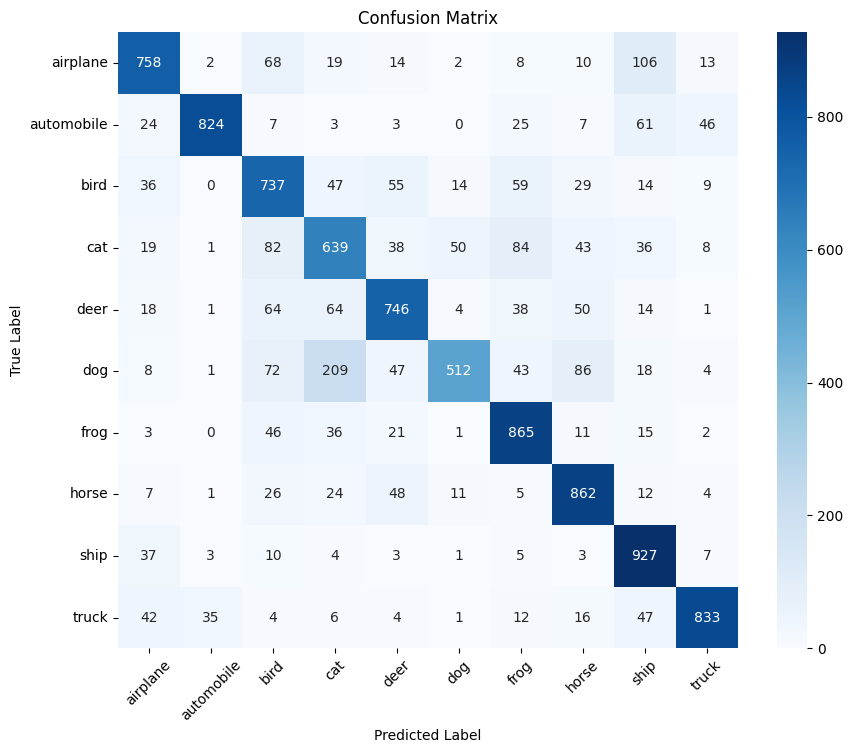

In [ ]:
# ------------------------------
# Confusion_matrix
# ------------------------------

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


# **ResNet50**

# **Model1**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# -------------------------------
# Load CIFAR-10
# -------------------------------
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

# Normalize to 0-1
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# -------------------------------
# Build ResNet50 (adapted for small input)
# -------------------------------
base_model = ResNet50(
    include_top=False,
    weights=None,        # no pretrained weights since 32x32 is too small
    input_shape=(32, 32, 3)
)
base_model.trainable = True  # we train from scratch

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# -------------------------------
# Compile
# -------------------------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# -------------------------------
# Train
# -------------------------------
history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=20,
    validation_split=0.2
)

# -------------------------------
# Evaluate
# -------------------------------
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,114,826 (91.99 MB)

 Trainable params: 24,061,706 (91.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 47ms/step - accuracy: 0.2895 - loss: 2.1123 - val_accuracy: 0.3919 - val_loss: 1.7786
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.4721 - loss: 1.4608 - val_accuracy: 0.4794 - val_loss: 1.4904
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.4886 - loss: 1.4254 - val_accuracy: 0.4363 - val_loss: 1.5367
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.5353 - loss: 1.3008 - val_accuracy: 0.4114 - val_loss: 1.7417
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.5806 - loss: 1.1899 - val_accuracy: 0.4736 - val_loss: 1.5359
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.6028 - loss: 1.1119 - val_accuracy: 0.3497 - val_loss: 2.0978
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5978 - loss: 1.1373 - val_accuracy: 0.5719 - val_loss: 1.1975
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6435 - loss: 1.0133 - 

In [ ]:
# ------------------------------
# Predictions
# ------------------------------


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


import numpy as np

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step
              precision    recall  f1-score   support

    airplane       0.79      0.75      0.77      1000
  automobile       0.90      0.68      0.78      1000
        bird       0.66      0.56      0.60      1000
         cat       0.62      0.42      0.50      1000
        deer       0.59      0.81      0.68      1000
         dog       0.64      0.66      0.65      1000
        frog       0.84      0.72      0.78      1000
       horse       0.76      0.77      0.76      1000
        ship       0.77      0.86      0.82      1000
       truck       0.65      0.89      0.75      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



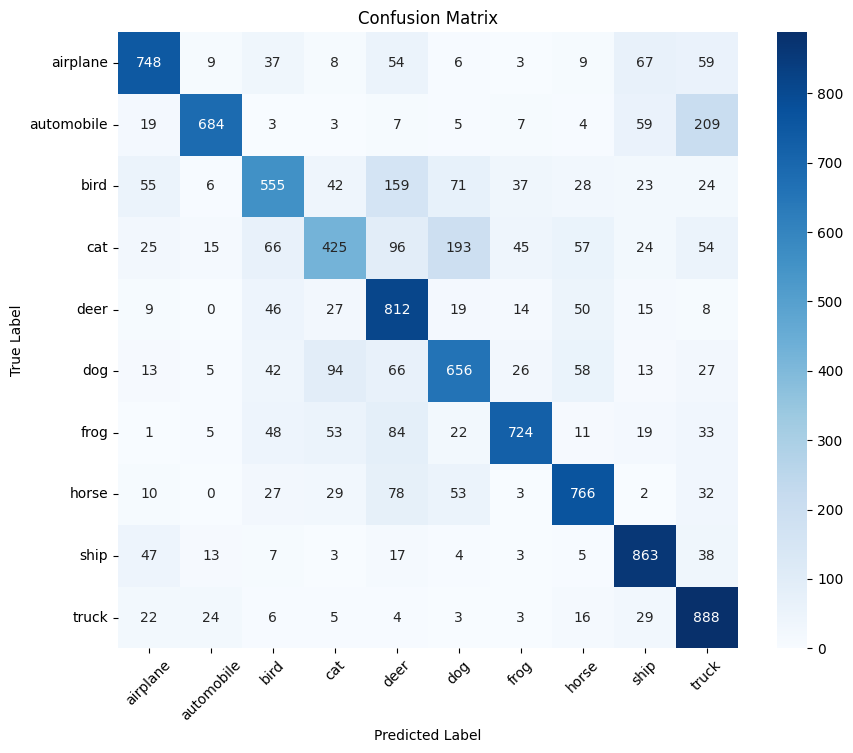

In [ ]:
# ------------------------------
# Confusion_matrix
# ------------------------------

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# **Model2**

with resizing 224x224 efficient way

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# -------------------------------
# Load CIFAR-10
# -------------------------------
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

# -------------------------------
# Create tf.data pipelines with on-the-fly resizing & preprocessing
# -------------------------------
batch_size = 64

def preprocess(image, label):
    # Resize and preprocess
    image = tf.image.resize(image, [224, 224])
    image = preprocess_input(tf.cast(image, tf.float32)) #Applies the official preprocessing for ResNet50
    return image, label

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.shuffle(5000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_ds = test_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# -------------------------------
# Build ResNet50 model
# -------------------------------
base_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)
base_model.trainable = False  # freeze pretrained base

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# -------------------------------
# Compile
# -------------------------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# -------------------------------
# Train model
# -------------------------------
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

# -------------------------------
# Evaluate model
# -------------------------------
loss, accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {accuracy:.4f}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,114,826 (91.99 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 163s 187ms/step - accuracy: 0.8341 - loss: 0.4903 - val_accuracy: 0.8924 - val_loss: 0.3197
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 147s 185ms/step - accuracy: 0.9110 - loss: 0.2501 - val_accuracy: 0.9033 - val_loss: 0.2856
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 147s 185ms/step - accuracy: 0.9260 - loss: 0.2111 - val_accuracy: 0.9082 - val_loss: 0.2784
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 147s 185ms/step - accuracy: 0.9379 - loss: 0.1715 - val_accuracy: 0.9062 - val_loss: 0.2882
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 147s 185ms/step - accuracy: 0.9447 - loss: 0.1536 - val_accuracy: 0.9041 - val_loss: 0.3130
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 147s 184ms/step - accuracy: 0.9558 - loss: 0.1196 - val_accuracy: 0.9113 - val_loss: 0.3035
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 147s 185ms/step - accuracy: 0.9658 - loss: 0.0939 - val_accuracy: 0.9072 - val_loss: 0.3424
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 147s 185ms/step - accuracy: 0.9723 -

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# -------------------------------
# Get predictions
# -------------------------------
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# y_test as a flat array
y_true = y_test

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# -------------------------------
# Classification report
# -------------------------------
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 175ms/step
              precision    recall  f1-score   support

    airplane       0.92      0.93      0.92      1000
  automobile       0.85      0.99      0.91      1000
        bird       0.91      0.89      0.90      1000
         cat       0.78      0.86      0.82      1000
        deer       0.89      0.90      0.90      1000
         dog       0.87      0.86      0.87      1000
        frog       0.95      0.92      0.94      1000
       horse       0.95      0.91      0.93      1000
        ship       0.95      0.94      0.95      1000
       truck       0.98      0.82      0.89      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



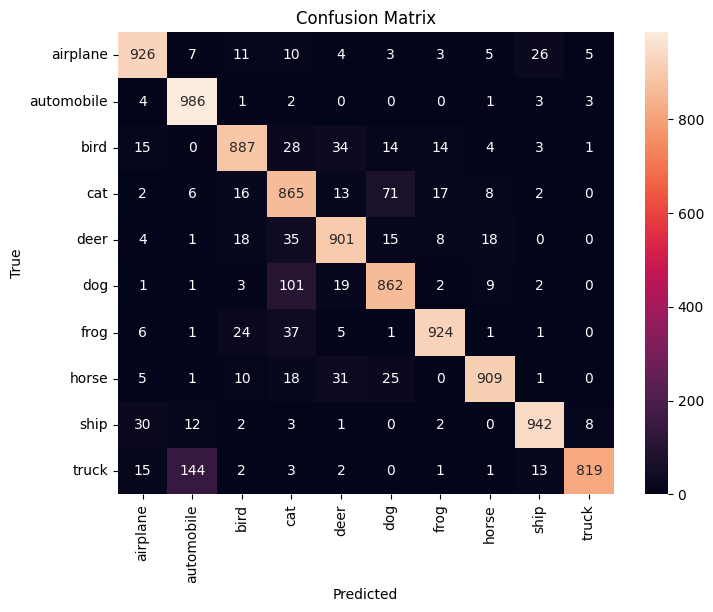

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# **Model3**

**ResNet50 with resizing 224x224 with fine-tuning**

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.keras.optimizers import Adam

In [6]:

# -------------------------------
# Load CIFAR-10
# -------------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()


# -------------------------------
# Resize + Data Augmentation
# -------------------------------
IMG_SIZE = 224

data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
])


def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = preprocess_input(image)   # ResNet preprocessing
    return image, label


batch_size = 64

train_ds = (
    tf.data.Dataset.from_tensor_slices((x_train, y_train))
    .map(lambda x, y: (tf.cast(x, tf.float32), y))
    .map(lambda x, y: (data_augmentation(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .shuffle(5000).batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)

test_ds = (
    tf.data.Dataset.from_tensor_slices((x_test, y_test))
    .map(lambda x, y: (tf.cast(x, tf.float32), y))
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(batch_size).prefetch(tf.data.AUTOTUNE)
)


# -------------------------------
# Load pretrained ResNet50
# -------------------------------
base_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

base_model.trainable = False  # freeze first


# -------------------------------
# Add classifier head
# -------------------------------
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(10, activation="softmax", dtype="float32")(x)

model = models.Model(inputs, outputs)


# -------------------------------
# Phase 1: Train classifier only
# -------------------------------

model.compile(
    optimizer=Adam(1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

history1 = model.fit(train_ds, epochs=5, validation_data=test_ds)


# -------------------------------
# Phase 2: Unfreeze last ResNet layers (fine-tune)
# -------------------------------
for layer in base_model.layers[-30:]:
    layer.trainable = True   # unfreeze last 30 layers


model.compile(
    optimizer=Adam(1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

history2 = model.fit(train_ds, epochs=15, validation_data=test_ds)


# -------------------------------
# Evaluate
# -------------------------------
loss, accuracy = model.evaluate(test_ds)
print(f"Final Test Accuracy: {accuracy:.4f}")


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 191s 221ms/step - accuracy: 0.2515 - loss: 2.2588 - val_accuracy: 0.7462 - val_loss: 0.8321
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 167s 210ms/step - accuracy: 0.6132 - loss: 1.1249 - val_accuracy: 0.8134 - val_loss: 0.5838
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 167s 210ms/step - accuracy: 0.6995 - loss: 0.8851 - val_accuracy: 0.8373 - val_loss: 0.4947
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 167s 209ms/step - accuracy: 0.7223 - loss: 0.7994 - val_accuracy: 0.8485 - val_loss: 0.4504
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 166s 209ms/step - accuracy: 0.7477 - loss: 0.7325 - val_accuracy: 0.8558 - val_loss: 0.4254
Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 242s 281ms/step - accuracy: 0.7732 - loss: 0.6686 - val_accuracy: 0.9041 - val_loss: 0.2757
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 210s 265ms/step - accuracy: 0.8566 - loss: 0.4155 - val_accuracy: 0.9218 - val_loss: 0.2272
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 210s 265ms/step - accuracy: 0.8864 - loss

In [7]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = y_test


157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 183ms/step


In [8]:
target_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

    airplane       0.97      0.94      0.96      1000
  automobile       0.95      0.98      0.96      1000
        bird       0.94      0.95      0.95      1000
         cat       0.93      0.83      0.88      1000
        deer       0.95      0.94      0.94      1000
         dog       0.90      0.93      0.92      1000
        frog       0.95      0.98      0.96      1000
       horse       0.94      0.97      0.95      1000
        ship       0.96      0.97      0.97      1000
       truck       0.96      0.95      0.95      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



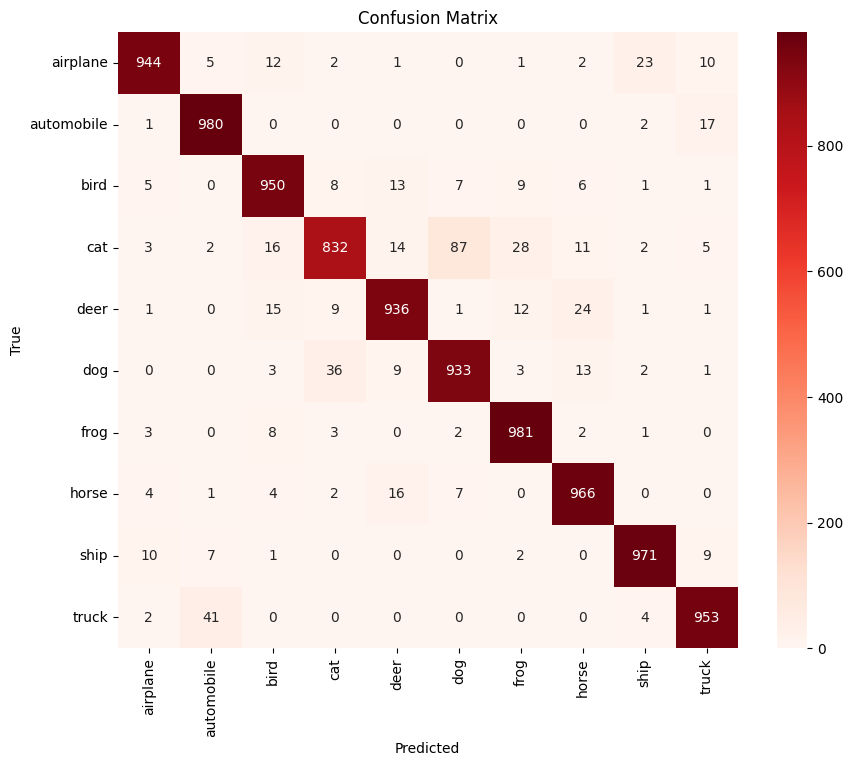

In [12]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Reds",
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


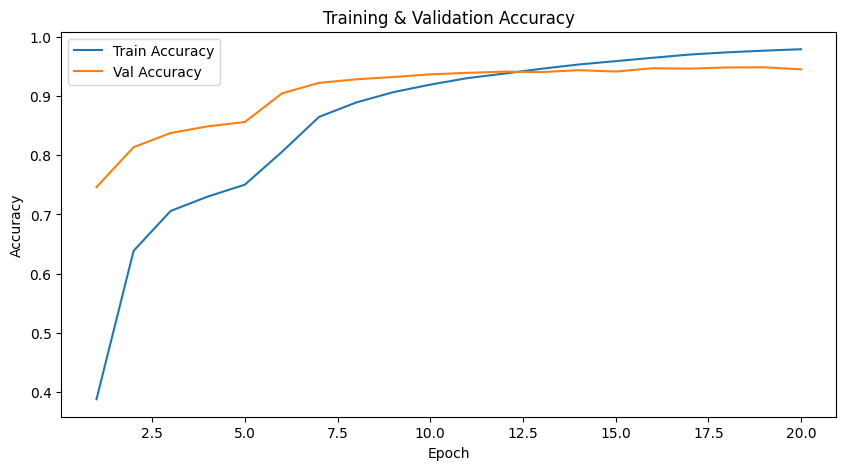

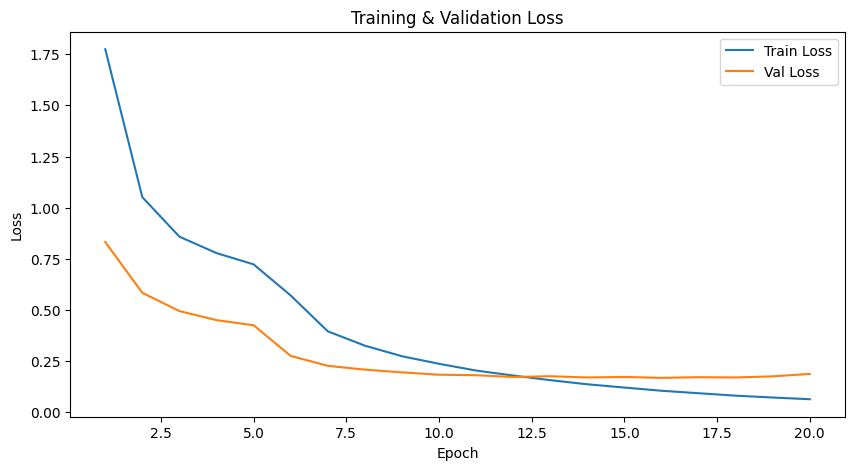

In [11]:
# Merge histories
acc = history1.history['accuracy'] + history2.history['accuracy']
val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
loss = history1.history['loss'] + history2.history['loss']
val_loss = history1.history['val_loss'] + history2.history['val_loss']

epochs = range(1, len(acc) + 1)

# ----- Accuracy -----
plt.figure(figsize=(10,5))
plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()

# ----- Loss -----
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()


# **Model 4**

**ResNet50 with resizing 224x224 without tuning**

This model is a Full training from scratch

Accuracy will be low unless you train very long (50–150 epochs).
due to trained image from ImageNet was not used, image was not preprocessed for ResNet50 but simple normalization, unfreeze the base model, which makes it trainable from scratch, thus giving lower accuracy compared to model 2

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers

# -------------------------------
# Load CIFAR-10
# -------------------------------
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

IMG_SIZE = 224
BATCH_SIZE = 64

# -------------------------------
# Dataset pipeline: resize on-the-fly
# -------------------------------
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0 #simple normalization : ❌ Not correct for ImageNet preprocessing
    return image, label

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.shuffle(5000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# -------------------------------
# Build ResNet50 from scratch
# -------------------------------
base_model = ResNet50(
    include_top=False,
    weights=None,  # ❌ NO PRETRAINED WEIGHTS : This version will NOT give good accuracy unless long training time
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)
#Unless I freeze the base model, by default base_model.trainable = True

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -------------------------------
# Train
# -------------------------------
history = model.fit(train_ds, epochs=20, validation_data=test_ds)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 560s 642ms/step - accuracy: 0.3096 - loss: 2.0603 - val_accuracy: 0.2953 - val_loss: 2.6499
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 475s 607ms/step - accuracy: 0.5866 - loss: 1.1437 - val_accuracy: 0.5504 - val_loss: 1.2980
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 475s 607ms/step - accuracy: 0.6886 - loss: 0.8672 - val_accuracy: 0.6055 - val_loss: 1.2785
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 475s 606ms/step - accuracy: 0.7575 - loss: 0.6950 - val_accuracy: 0.6555 - val_loss: 1.0914
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 474s 605ms/step - accuracy: 0.7952 - loss: 0.5925 - val_accuracy: 0.7635 - val_loss: 0.7410
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 474s 605ms/step - accuracy: 0.8189 - loss: 0.5194 - val_accuracy: 0.7860 - val_loss: 0.6285
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 474s 606ms/step - accuracy: 0.8483 - loss: 0.4364 - val_accuracy: 0.7877 - val_loss: 0.6523
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 475s 606ms/step - accuracy: 0.8682 -

In [18]:

# -------------------------------
# Evaluate model
# -------------------------------
loss, accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {accuracy:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 170ms/step - accuracy: 0.8047 - loss: 0.9235
Test accuracy: 0.8064


In [16]:
import numpy as np
from sklearn.metrics import classification_report

# -------------------------------
# Get predictions
# -------------------------------
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# y_test as a flat array
y_true = y_test

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# -------------------------------
# Classification report
# -------------------------------
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 192ms/step
              precision    recall  f1-score   support

    airplane       0.94      0.73      0.83      1000
  automobile       0.95      0.84      0.89      1000
        bird       0.75      0.76      0.75      1000
         cat       0.72      0.62      0.67      1000
        deer       0.75      0.88      0.81      1000
         dog       0.62      0.86      0.72      1000
        frog       0.88      0.84      0.86      1000
       horse       0.99      0.65      0.79      1000
        ship       0.91      0.91      0.91      1000
       truck       0.75      0.97      0.85      1000

    accuracy                           0.81     10000
   macro avg       0.83      0.81      0.81     10000
weighted avg       0.83      0.81      0.81     10000



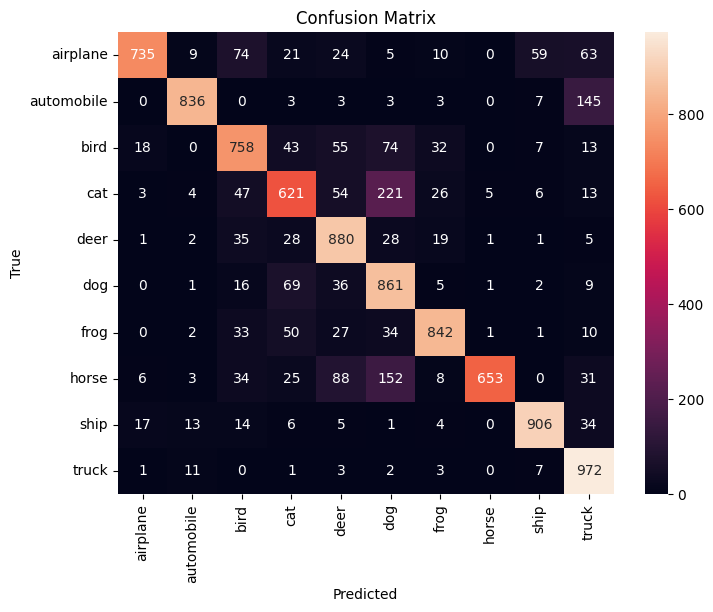

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()